In [65]:
import pandas as pd 

df = pd.read_excel('C:/Users/HP/Desktop/Prévision/temp.xlsx', index_col=0) 

In [66]:
df

date  TOTAL CHARGE
0  2018-10-07      61369.14
1  2018-10-08       7800.00
2  2018-10-14      35700.10
3  2018-10-21      38946.86
4  2018-10-28      84771.08
..        ...           ...
65 2019-10-06      98374.26
66 2019-10-13      75651.70
67 2019-10-20      75196.18
68 2019-10-27     142921.59
69 2019-10-30      15000.00

[70 rows x 2 columns]

In [67]:
df['date']= pd.to_datetime(df['date']) 
df.set_index('date',inplace=True)

# Notre série temporelle

<AxesSubplot:xlabel='date'>

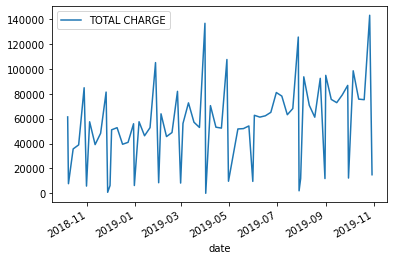

In [68]:
df.plot()

# La tendance

<AxesSubplot:xlabel='date'>

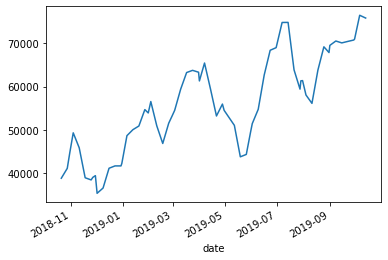

In [75]:

from statsmodels.tsa.seasonal import seasonal_decompose

import plotly  

decomposition = seasonal_decompose(df, period=6)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual= decomposition.resid

trend.plot()


# La saisonalité

<AxesSubplot:xlabel='date'>

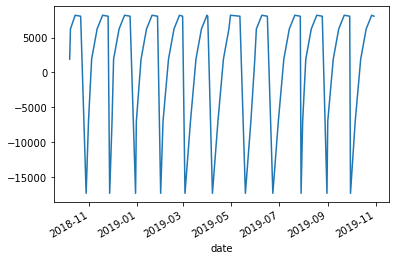

In [76]:
seasonal.plot()

# Les résidus

<AxesSubplot:xlabel='date'>

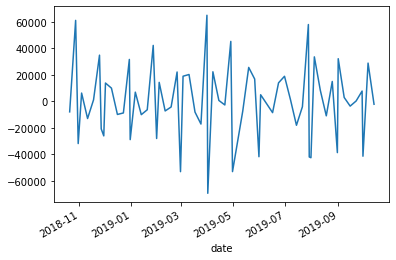

In [77]:
residual.plot()

# La moyenne mobile

In [84]:
Charge_mean = df.rolling(window = 6).mean()

<AxesSubplot:xlabel='date'>

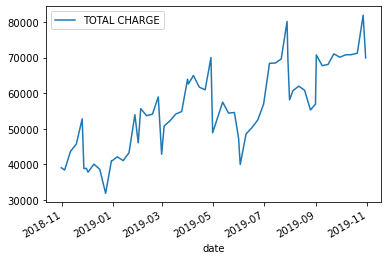

In [85]:
Charge_mean.plot()

# Analyse sur la période du mois 6

In [86]:
import pandas as pd 

df = pd.read_excel('C:/Users/HP/Desktop/Prévision/Total.xlsx', index_col=0) 

In [87]:
# Convert Date into Datetime
df['BILLING CYCLE DATE']=pd.to_datetime(df['BILLING CYCLE DATE'])

In [88]:
df['BILLING CYCLE DATE']

DOCUMENT TYPE
MCIINV   2018-10-07
MCIINV   2018-10-07
MCIINV   2018-10-07
MCIINV   2018-10-07
MCIINV   2018-10-07
            ...    
MCIINV   2019-10-27
MCIINV   2019-10-27
MCIINV   2019-10-27
MCIINV   2019-10-27
MCIINV   2019-10-30
Name: BILLING CYCLE DATE, Length: 4211, dtype: datetime64[ns]

In [89]:
df_ne = df.groupby(['BILLING CYCLE DATE','SERVICE CODE'],as_index=False)['TOTAL CHARGE'].sum()

In [90]:
df_ne

BILLING CYCLE DATE SERVICE CODE  TOTAL CHARGE
0            2018-10-07           AB      15281.71
1            2018-10-07           AM          4.86
2            2018-10-07           CM       2032.20
3            2018-10-07           CN        756.74
4            2018-10-07           CV        180.00
...                 ...          ...           ...
1544         2019-10-27           S3         -9.10
1545         2019-10-27           S5         -9.40
1546         2019-10-27           S9          1.00
1547         2019-10-27           SB        663.90
1548         2019-10-30           DC      15000.00

[1549 rows x 3 columns]

In [97]:
periode = (df_ne['BILLING CYCLE DATE'] > '2019-09-07') & (df_ne['BILLING CYCLE DATE'] <= '2019-09-30')
print(df_ne.loc[periode])

     BILLING CYCLE DATE SERVICE CODE  TOTAL CHARGE
1310         2019-09-08           AB      29884.42
1311         2019-09-08           AM         10.62
1312         2019-09-08           C2         30.00
1313         2019-09-08           CM       3608.74
1314         2019-09-08           CN       1134.30
...                 ...          ...           ...
1424         2019-09-29           SB        724.20
1425         2019-09-29           UW          0.75
1426         2019-09-30           F1      10666.23
1427         2019-09-30           F2        400.00
1428         2019-09-30           MW       1259.75

[119 rows x 3 columns]


In [98]:
periode.idxmax(axis="columns")

1310